In [1]:
import sys
import os
from dotenv import load_dotenv

sys.path.append(os.path.abspath('src'))

In [2]:
import SoccerNet
from SoccerNet.Downloader import SoccerNetDownloader

mySoccerNetDownloader=SoccerNetDownloader(LocalDirectory="SoccerNet")
load_dotenv()
mySoccerNetDownloader.password = os.getenv("SOCCERNET_KEY")

# # Downloading the annotations of the 500 games
# mySoccerNetDownloader.downloadGames(files=["Labels-v2.json"], split=["train","valid","test"])

# mySoccerNetDownloader.downloadGames(files=["1_ResNET_TF2_PCA512.npy", "2_ResNET_TF2_PCA512.npy"], split=["train","valid","test","challenge"])

In [3]:
from utils import Utilities
utilities = Utilities("SoccerNet")

# utilities.save_labels_in_csv()

In [4]:
from data_loading import DataLoading

batch_size = 32
fps = 2
chunk_length = 60

train_dataloading = DataLoading("SoccerNet", fps, chunk_length, batch_size, split_type="train")
val_dataloading = DataLoading("SoccerNet", fps, chunk_length, batch_size, split_type="valid")

train_loader = train_dataloading.get_dataloader()
val_loader = val_dataloading.get_dataloader()


In [5]:
import torch
from torch.utils.data import DataLoader
import model
import numpy as np

from training import Trainer

classifier = model.Model(input_dim=512, num_classes=17)


In [6]:
trainer = Trainer(classifier, train_loader, val_loader, epochs=200, batch_size=batch_size, prediction_threshold=0.5)
# trainer.load_checkpoint("weights/model_0_2.pth")

In [7]:
trainer.train()

Epoch 1/200: Loss = 0.3471, training mAP = 0.3007, validation mAP = 0.2856
Epoch 2/200: Loss = 0.2700, training mAP = 0.3688, validation mAP = 0.3428
Epoch 3/200: Loss = 0.2602, training mAP = 0.4002, validation mAP = 0.3610
Epoch 4/200: Loss = 0.2548, training mAP = 0.4130, validation mAP = 0.3664
Epoch 5/200: Loss = 0.2511, training mAP = 0.4315, validation mAP = 0.3789
Epoch 6/200: Loss = 0.2482, training mAP = 0.4457, validation mAP = 0.3874
Epoch 7/200: Loss = 0.2458, training mAP = 0.4576, validation mAP = 0.3910
Epoch 8/200: Loss = 0.2447, training mAP = 0.4714, validation mAP = 0.3946
Epoch 9/200: Loss = 0.2423, training mAP = 0.4718, validation mAP = 0.3994
Epoch 10/200: Loss = 0.2399, training mAP = 0.4871, validation mAP = 0.4070
Epoch 11/200: Loss = 0.2386, training mAP = 0.4924, validation mAP = 0.4059
Epoch 12/200: Loss = 0.2370, training mAP = 0.5034, validation mAP = 0.4117
Epoch 13/200: Loss = 0.2356, training mAP = 0.5094, validation mAP = 0.4114
Epoch 14/200: Loss = 

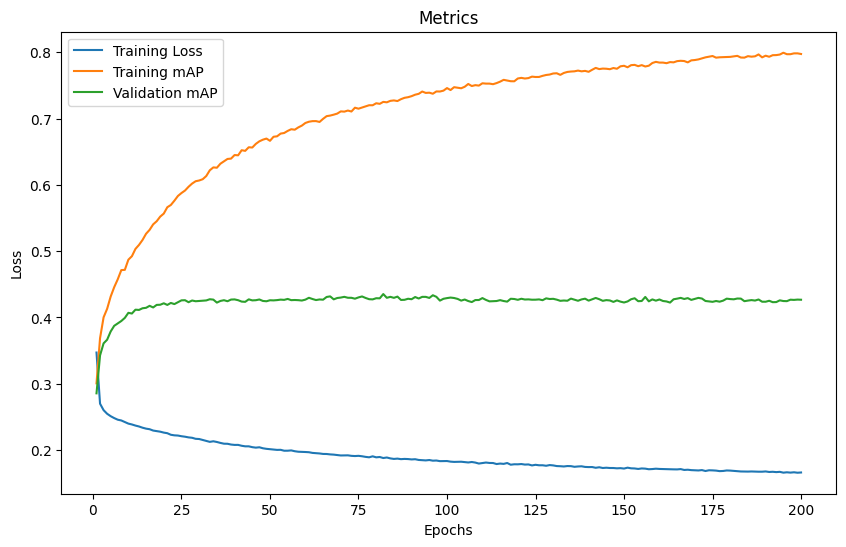

In [8]:
trainer.plot_training_loss()
# trainer.save_checkpoint("weights/model_0_2.pth")

In [9]:
from event_spotting import EventSpotter

test_dataloading = DataLoading("SoccerNet", 1, chunk_length=1, batch_size=1, split_type="test")

(5400, 512)
(5400, 17)
[[  6.500095   -10.232788    13.768982   ...  -0.39546517   0.5537336
   -0.4141675 ]
 [ 10.23063    -10.377187    10.965774   ...  -0.63641405   0.7312847
   -0.5103248 ]
 [ 10.127903    -9.7196      10.979615   ...  -0.5280806    0.4497399
   -0.32734787]
 [ 13.272164   -10.959559     8.427803   ...  -0.22308798   0.43073413
   -0.40579188]
 [ 14.630885    -6.7566323    7.3896713  ...  -0.2651968    0.6953006
   -0.30757117]]
[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[7.842405466362834e-05, 1.3213533748057671e-05, 2.1214234535715804e-10, 5.470002228946669e-09, 0.0021472240332514048, 1.4958498439909818e-08, 0.0003599465999286622, 0.9999986886978149, 6.046487396815792e-05, 4.257564082104509e-13, 8.510892257618252e-06, 3.057060160571723e-09, 1.941172200758956e-07, 0.0008903132402338088, 0.00010699106496758759, 4.4932879973

c:\Python310\lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


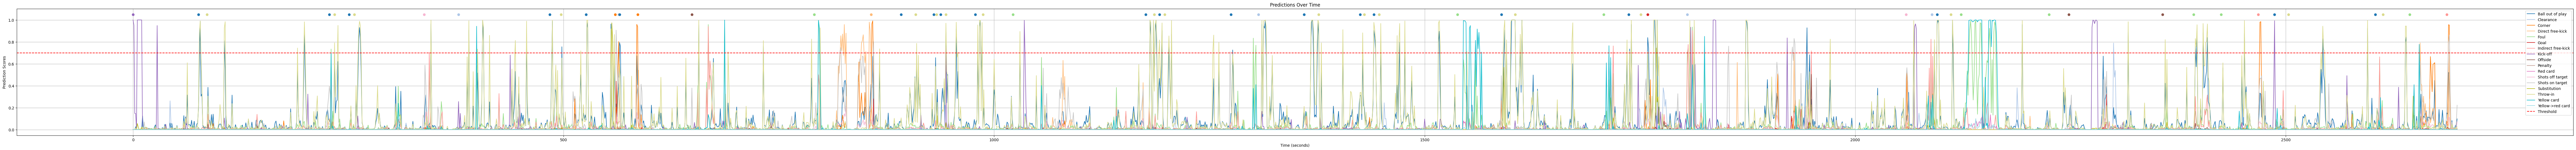

In [10]:
video_name = test_dataloading.video_names[0]

features, labels = test_dataloading.load_features_labels(video_name, half=1)

print(features.shape)
print(labels.shape)

print(features[:5])
print(labels[:5])

event_spotter = EventSpotter(model=classifier, fps=fps, detection_threshold=0.7, nms_window=60, delta=60)

event_spotter.detect_events(features)

raw_predictions = event_spotter.get_predictions()
final_events = event_spotter.get_events()

ground_truth = {i: labels[i] for i in range(len(labels))}  # Format ground truth
print(f"Ground truth: {ground_truth}")
evaluation = event_spotter.evaluate_predictions(ground_truth)

print("Raw Predictions:", raw_predictions)
print("Final Detected Events:", final_events)
print("Evaluation Metrics:", evaluation)

event_spotter.show_predictions_summary(ground_truth, True)

In [11]:
# Downloading the videos of the 500 games
# mySoccerNetDownloader.downloadGames(files=["1_224p.mkv", "2_224p.mkv"], split=["train","valid","test","challenge"])

In [12]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 20)
pd.set_option('display.colheader_justify', 'center')

annotations_df = utilities.parse_labels_json()
annotations_engineered_df = utilities.parse_labels_json_with_feature_engineering()

display(annotations_df.head())
annotations_df.to_csv("annotations.csv", index=False)

display(annotations_engineered_df.head(100))
annotations_engineered_df.to_csv("annotations_engineered.csv", index=False)

AttributeError: 'Utilities' object has no attribute 'parse_labels_json'

In [ ]:
print("Number of rows:", annotations_engineered_df.shape[0])
print("Number of columns:", annotations_engineered_df.shape[1])

In [ ]:
print("DataFrame Info:")
print(annotations_engineered_df.info())

In [ ]:
print("Missing Values per Column:")
print(annotations_engineered_df.isnull().sum())


In [ ]:
print("Descriptive Statistics (Including Non-Numerical):")
display(annotations_engineered_df.describe(include='all'))

In [ ]:
# Number of unique labels (excluding game-related columns)
label_columns = [col for col in annotations_engineered_df.columns if col.startswith('label_')]
unique_labels = len(label_columns)
print("Number of unique labels:", unique_labels)

# List of unique labels (based on the column names)
print("Unique labels:", label_columns)


In [ ]:
utilities.print_labels_distribution(annotations_engineered_df)

In [ ]:
utilities.print_labels_frequency(annotations_engineered_df)

In [ ]:
utilities.print_labels_frequency_per_league(annotations_engineered_df)

In [ ]:
utilities.print_labels_distribution_over_game_intervals(annotations_engineered_df)